# Logistic Regression

In [14]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix

## imprts csv file

In [2]:
df = pd.read_csv('diabetes.csv')

## get the correlation matrix

In [3]:
correlation_matrix = df.corr()

## Display the correlation matrix

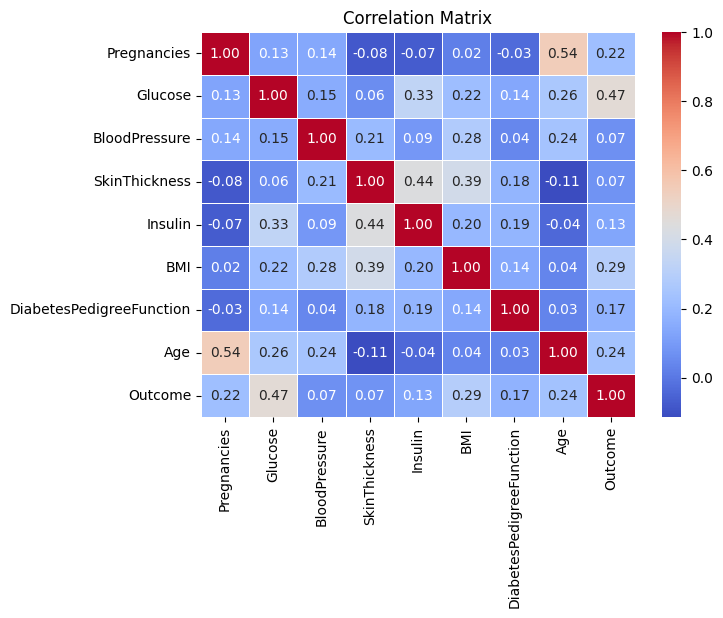

In [4]:
plt.figure(figsize=(7, 5)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


## Display a histogram of each parameter

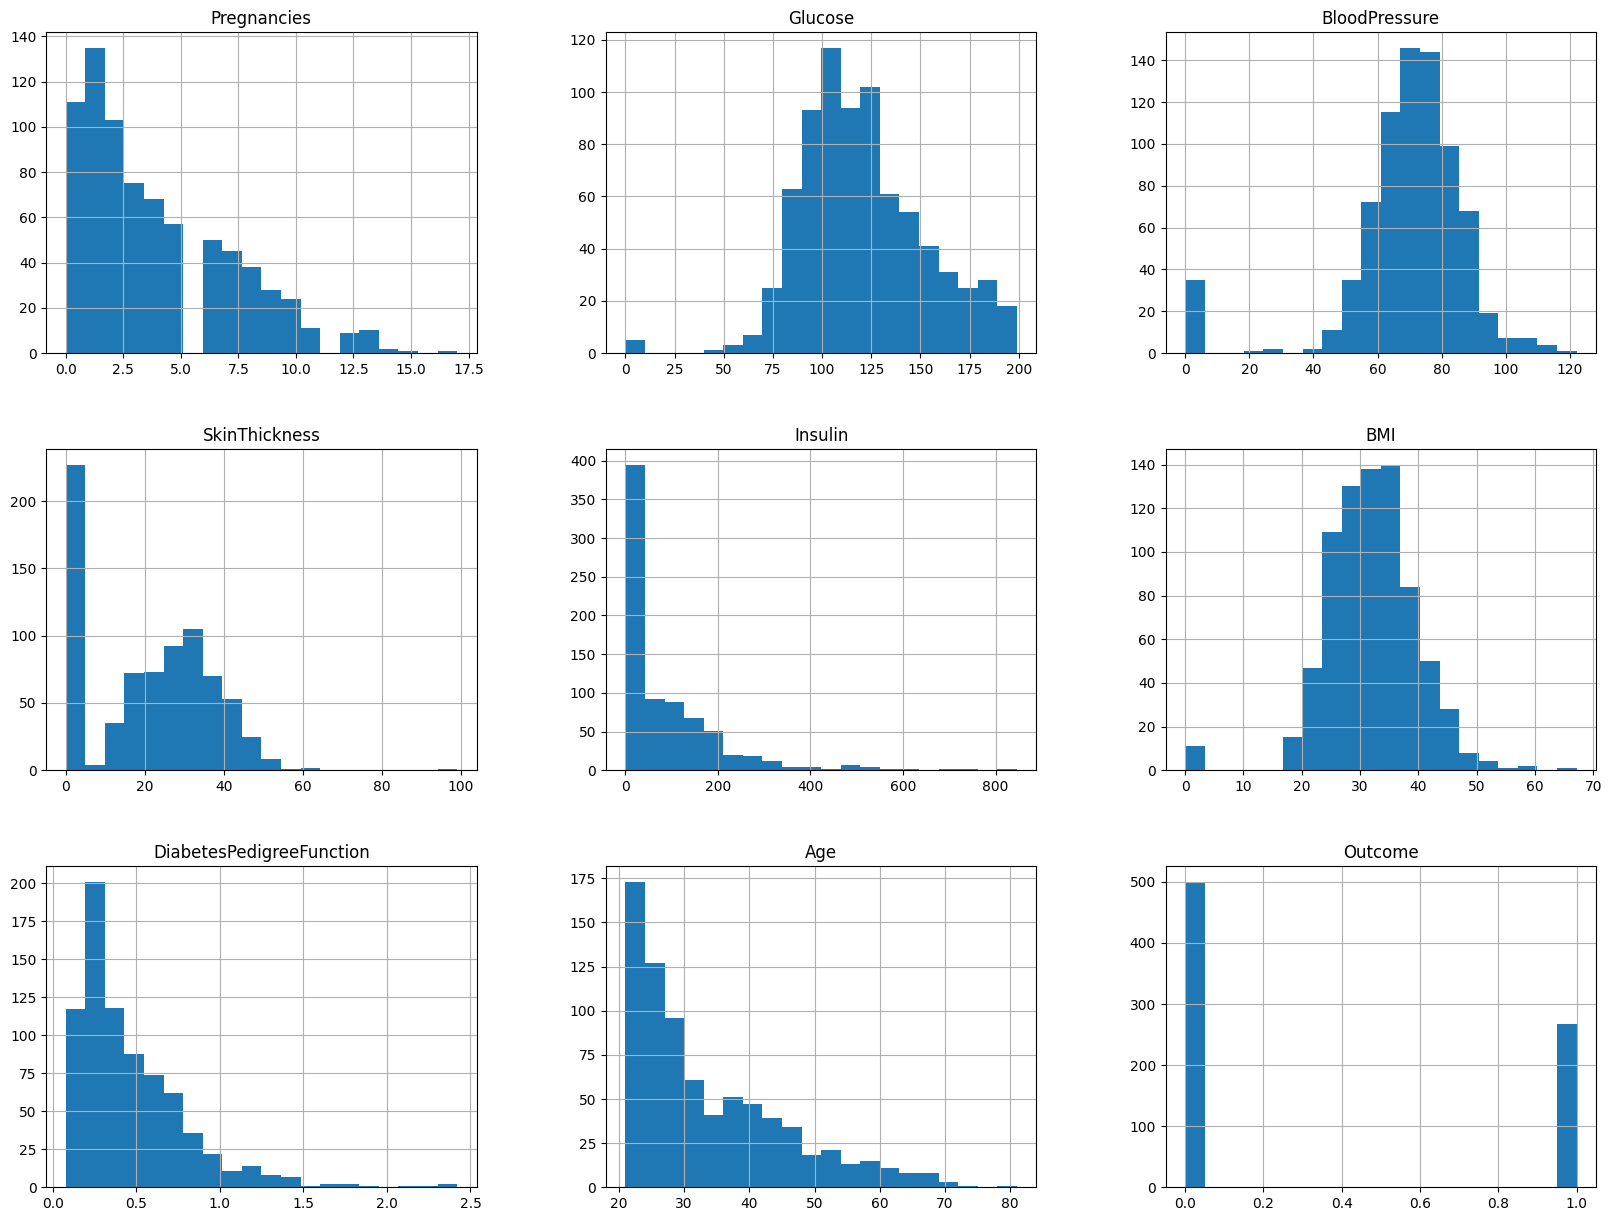

In [5]:
df.hist(figsize=(20, 15), bins=20)
plt.show()

## Get the mean and Standard Deviation for each parameter.


## Calculate the mean for each column

In [6]:
mean_values = df.mean()

## Calculate the standard deviation for each column

In [7]:
std_dev_values = df.std()

## Display the results

In [8]:
print("Mean Values:\n", mean_values)
print("\nStandard Deviation Values:\n", std_dev_values)

Mean Values:
 Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

Standard Deviation Values:
 Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
Outcome                       0.476951
dtype: float64


## Check for missing values

In [9]:
missing_values = df.isnull().any()

In [10]:
print("Are there any mising values in each column?\n", missing_values);

Are there any mising values in each column?
 Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


## Normalise each parameter to have a mean of zero and a standard deviation of 1.0

In [11]:
scaler = StandardScaler()

# Remove outcome colum from df
df_without_outcome = df.drop('Outcome', axis=1)
target = df[['Outcome']]

#Fit and Transform the Data (without target)
scaled_without_outcome = scaler.fit_transform(df_without_outcome)

# Convert the scaled features array back to a DataFrame 
scaled_df_without_outcome = pd.DataFrame(scaled_without_outcome, columns=df_without_outcome.columns)

# Concat the scaled features with the target column Outcome
normalized_df = pd.concat([scaled_df_without_outcome, target.reset_index(drop=True)], axis=1)

# Display the first few rows of the normalized DataFrame
print(normalized_df.head())

print("Mean after scaling:\n", normalized_df.mean())
print("\nStandard Deviation after scaling:\n", normalized_df.std())



   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.468492  1.425995        1  
1                 -0.365061 -0.190672        0  
2                  0.604397 -0.105584        1  
3                 -0.920763 -1.041549        0  
4                  5.484909 -0.020496        1  
Mean after scaling:
 Pregnancies                -6.476301e-17
Glucose                    -9.251859e-18
BloodPressure               1.503427e-17
SkinThickness               1.006140e-16
Insulin                    -3.006854e-17
BMI        

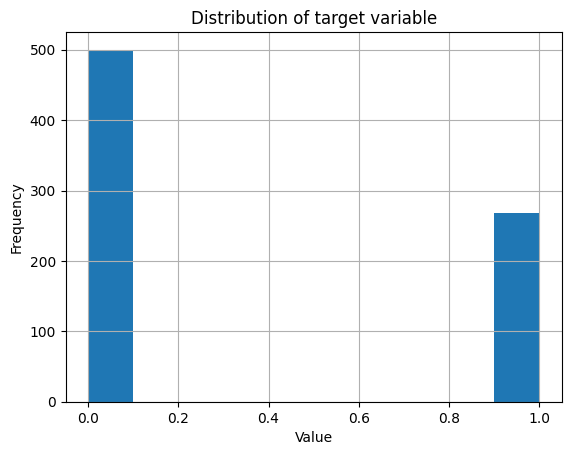

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64


In [12]:
normalized_df['Outcome'].hist()
plt.title('Distribution of target variable')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Descriptive statistics
print(df['Outcome'].describe())


## Split the Data into Train: 60%, Validation:20% and Test:20%

In [13]:
X_train, X_test, y_train, y_test = train_test_split(normalized_df, target, test_size=0.20, random_state=20)

# Support Vectoro Machine

In [16]:
y_train = y_train.ravel()
y_test = y_test.ravel()

model = svm.SVC(kernel='linear')  # Start with a linear kernel
model.fit(X_train, y_train)  # Train the model

AttributeError: 'DataFrame' object has no attribute 'ravel'

# Decision Tree